### Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
!pip install xlrd==1.2.0

You should consider upgrading via the 'f:\python-3.6\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install openpyxl

You should consider upgrading via the 'f:\python-3.6\python.exe -m pip install --upgrade pip' command.


In [4]:
train=pd.read_excel('Data_Train.xlsx',engine='openpyxl')

In [5]:
train.shape

(10683, 11)

In [6]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train.dropna(inplace=True)

Extracting day,month,year,weekday from Date of Journey

In [10]:
train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
train['weekday']= pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [11]:
train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

Converting duration into minutes

In [12]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
train['Duration']=train['Duration'].apply(duration)

Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [13]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train['Dep_Time']=train['Dep_Time'].apply(deparrtime)
train['Arrival_Time']=train['Arrival_Time'].apply(deparrtime)

Converting total_stops to 0,1,2,3 and so on

In [14]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
train['Total_Stops']=train['Total_Stops'].apply(stops)

In [15]:
pd.options.mode.chained_assignment = None 
for i in range(train.shape[0]):
    if(train.iloc[i]['Additional_Info']=='No info'):
        train.iloc[i]['Additional_Info']='No Info' 
train=train.drop(['Route'], axis=1) #we don't need it as we already have total_stops
train.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  weekday          10682 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


In [17]:
train["Duration"] = train["Duration"].astype(int)
train["Journey_Day"] = train["Journey_Day"].astype(object)
train["Journey_Month"] = train["Journey_Month"].astype(object)
train["weekday"] = train["weekday"].astype(object)


In [18]:
df1 =train.copy() 
df1["Journey_Month"]=df1["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) #assigning month names
df1["Journey_Month"]=df1["Journey_Month"].astype(object)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  int32 
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  object
 10  Journey_Month    10682 non-null  object
 11  weekday          10682 non-null  object
dtypes: int32(1), int64(1), object(10)
memory usage: 1.0+ MB


#### Data Visualization

[Text(0, 0, 'March'),
 Text(1, 0, 'May'),
 Text(2, 0, 'June'),
 Text(3, 0, 'April')]

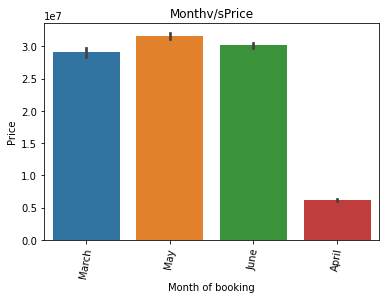

In [19]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_Month', y='Price', data=df1,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

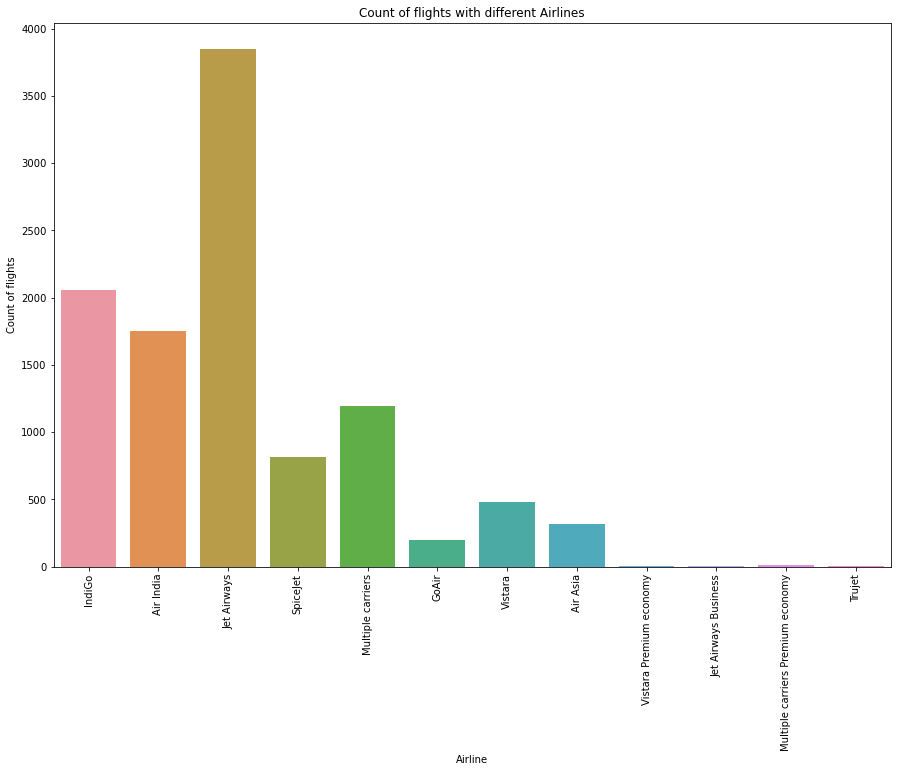

In [20]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)


#### Analysis :

Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range .

<AxesSubplot:xlabel='Duration', ylabel='Price'>

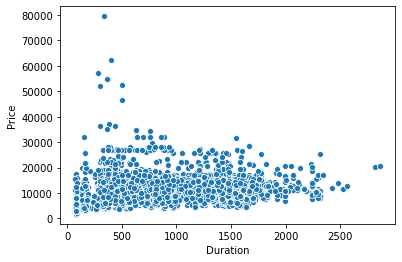

In [21]:
#duration v/s AveragePrice
sns.scatterplot(data=train, x='Duration', y='Price')

We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there
must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of 
flight(higher if collides with a public holiday)
#Deptarure time v/s AveragePrice

[Text(0, 0, 'Night'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Evening'),
 Text(3, 0, 'Afternoon')]

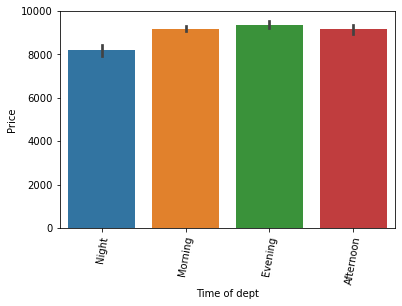

In [22]:
v2=sns.barplot(x='Dep_Time', y='Price', data=train)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)

Early Morning flights are always cheaper and so are midnight flight prices.

Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.¶

Text(0.5, 0, 'Arrival_time')

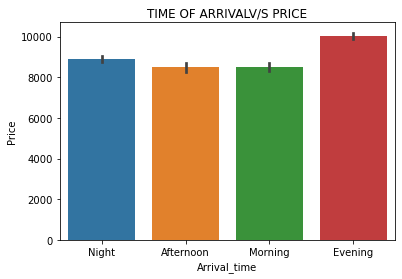

In [23]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=train)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

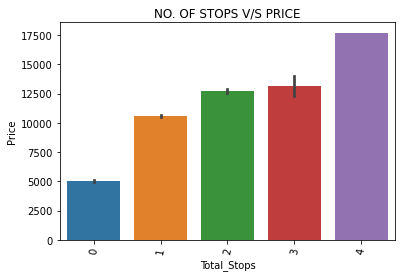

In [24]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=train)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no.
of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same

Text(0.5, 0, 'WEEKDAY')

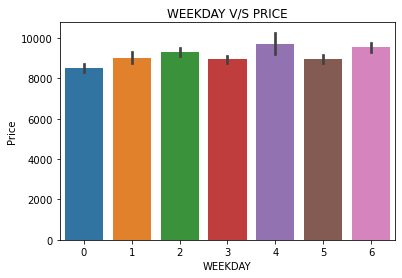

In [25]:
#WEEKDAY V/S average price
v4=sns.barplot(x='weekday', y='Price', data=train)
v4.set_title('WEEKDAY V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('WEEKDAY')

Text(0, 0.5, 'Count of flights')

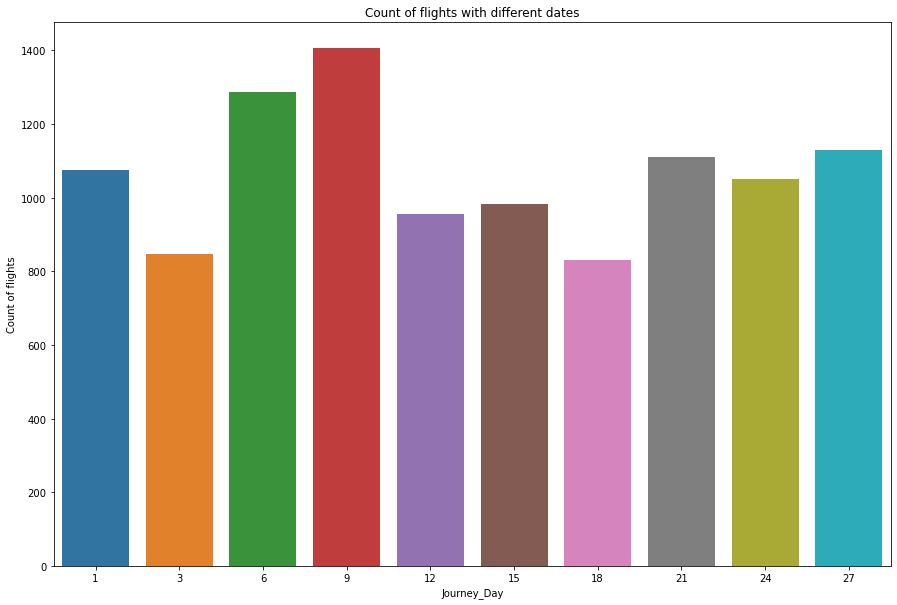

In [26]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'Journey_Day', data =train)
plt.xlabel('Journey_Day')
plt.ylabel('Count of flights')

Text(0.5, 0, 'date')

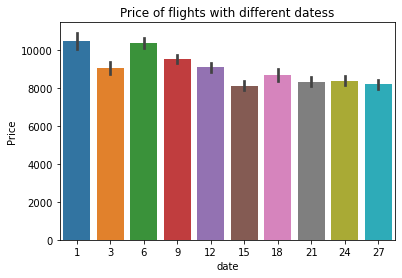

In [27]:
#Journey_Day v/s Average price
v5=sns.barplot(x='Journey_Day', y='Price', data=train)
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('date')

In [28]:
print(train.dtypes)

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration            int32
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day        object
Journey_Month      object
weekday            object
dtype: object


Encode the data

In [29]:
# Import label encoder 
colnames = list(train.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if train[col].dtype==object:
        train[col]= label_encoder.fit_transform(train[col]) 

In [30]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,8,3897,8,0,6
1,1,3,0,2,0,445,2,8,7662,0,2,2
2,4,2,1,2,3,1140,2,8,13882,3,3,6
3,3,3,0,1,3,325,1,8,6218,4,2,6
4,3,0,5,1,3,285,1,8,13302,0,0,4


<AxesSubplot:title={'center':'Correlation between columns'}>

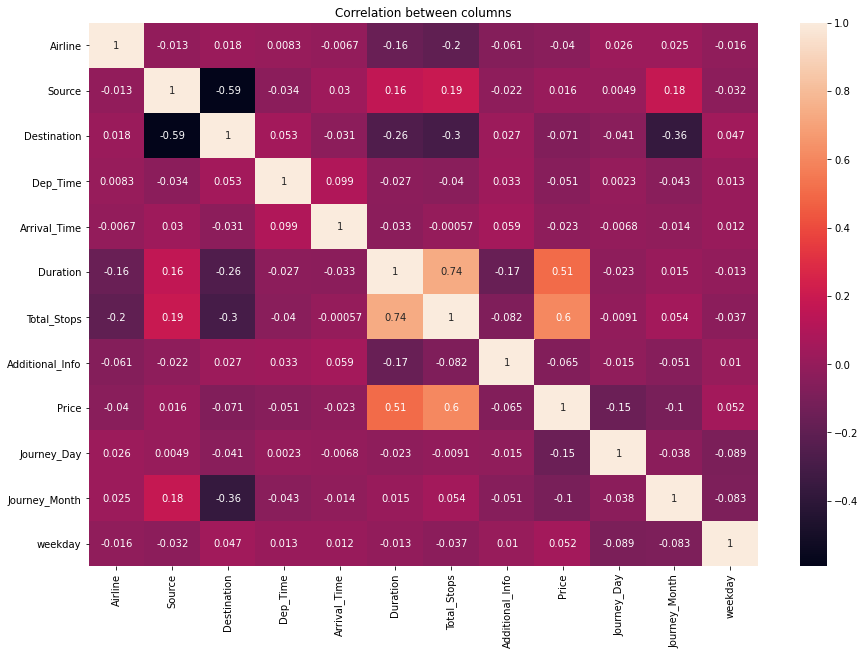

In [31]:
plt.figure(figsize = (15, 10))
plt.title('Correlation between columns')
corr=train.corr()
sns.heatmap(corr,annot=True)

In [32]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,8,3897,8,0,6
1,1,3,0,2,0,445,2,8,7662,0,2,2
2,4,2,1,2,3,1140,2,8,13882,3,3,6
3,3,3,0,1,3,325,1,8,6218,4,2,6
4,3,0,5,1,3,285,1,8,13302,0,0,4


In [33]:
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Price              1.000000
Total_Stops        0.603897
Duration           0.506604
weekday            0.051570
Source             0.015999
Arrival_Time      -0.022538
Airline           -0.039565
Dep_Time          -0.051135
Additional_Info   -0.065463
Destination       -0.071122
Journey_Month     -0.103643
Journey_Day       -0.154611
Name: Price, dtype: float64


In [34]:
X=train.drop(['Price'],axis=1)
y=train['Price']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5)

In [37]:
regressor=RandomForestRegressor(n_estimators = 100, random_state = 15)
regressor.fit(X_train,y_train)
y_Pred=regressor.predict(X_test)
scores=r2_score(y_test,y_Pred)
scores

0.8032213908760231

In [38]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [39]:
regressor=RandomForestRegressor(n_estimators = 100, random_state = 15)
regressor.fit(X_train,y_train)
y_Pred=regressor.predict(X_test)
scores=r2_score(y_test,y_Pred)
scores

0.8037578522483936

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid =[{'n_estimators': [10,30],'max_features':[6,8]}]#,{'bootstrap':[False]'n_estimators': [10,30],'max_features':[6,8]}]
forest_reg = RandomForestRegressor(random_state=42)
grid_search= GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [6, 8], 'n_estimators': [10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [42]:
final_model = grid_search.best_estimator_
y_Pred=final_model.predict(X_test)
scores=r2_score(y_test,y_Pred)
scores

0.8468251546737359